#  Q3. Truncated Standard Normal Distribution

In [2]:
using Random, Distributions
using Printf


In [3]:
using Pkg
Pkg.add("SpecialFunctions")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [4]:
Pkg.add("Distances") #if you don't have it
using Distances

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [5]:
function trunc_nor(a)
    
    
    while true
        U = rand(Uniform(0,1))
        X = rand(Normal()) # Draw Proposal

        dbino = (1/(cdf(Normal(),a) - cdf(Normal(),-a)))*pdf(Normal(), X)
        dpois = pdf(Normal(),X)
        
        c = 1/(cdf(Normal(),a) - cdf(Normal(),-a))
        
        ratio = dbino/(c*dpois)
        
        if X >= -a && X<=a
            if U < ratio
                return X
            end
        end
    end
end



trunc_nor (generic function with 1 method)

In [6]:
c = AbstractFloat[]
for i in 1:100000
    append!(c, trunc_nor(4))
end
d = AbstractFloat[]
for i in 1:100000
    append!(d, trunc_nor(1))
end

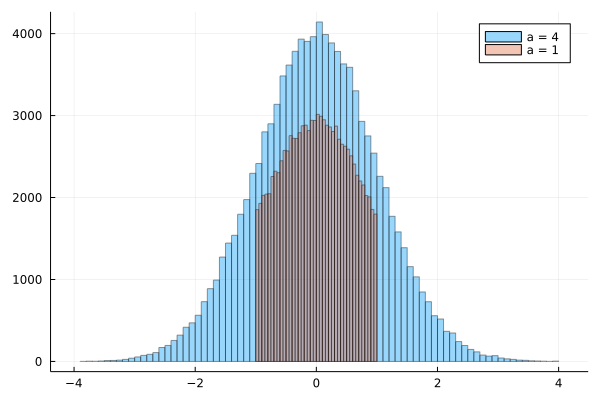

In [7]:
using Plots
histogram([c d], label = ["a = 4" "a = 1"], seriesalpha = 0.4)

# Q2. p-dimensional Sphere

In [8]:
using SpecialFunctions

In [9]:
function p_sphere(p)
    X = Array{Float64}(undef, p)
    zero = Array{Float64}(undef, p)
    
    while true
        for i in 1:p
            X[i] = rand(Uniform(-1,1))
            zero[i] = 0
        end
        U = rand(Uniform(0,1))
        
        c = cal_c(p)
        
        ratio = 1/c^2
        
        if euclidean(X,zero) <= 1 && euclidean(X,zero) >= -1
            if U < ratio
                return X[:,:]
            end
        end
    end
end

function cal_c(p)
    return gamma(p/2 + 1)*(2^p)/(pi^(p/2))
end

cal_c (generic function with 1 method)

In [10]:
function s(p,n)
    s_0 = Array{Float64}(undef, 0)
    for i in 1:n
        append!(s_0, p_sphere(p))
    end
    s_0 = reshape(s_0, p, n)

    return s_0
end

s (generic function with 1 method)

In [11]:
function plot_result(p,n)  
    l = s(p,n)
    x = l[1,:]
    y = l[2,:]
    scatter(x, y, size=(500, 500))
end


plot_result (generic function with 1 method)

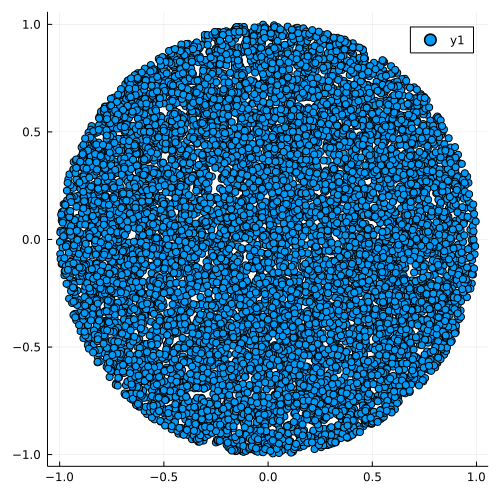

In [12]:
plot_result(2,10000)

In [13]:
for i in 2:6
    print(string(cal_c(i)))
    print(" For p = ", i, "\n")
    
end

1.2732395447351628 For p = 2
1.909859317102744 For p = 3
3.242277876554809 For p = 4
6.0792710185402665 For p = 5
12.384589222348605 For p = 6


As p increases the mean number of iterations to give output also increases as more rejection due to increased c. 

# Q1. 